<a href="https://colab.research.google.com/github/PALLAVI-web2002/predicting-coffee-sales-ml/blob/main/Uber_Trip_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Load and prepare data
def load_and_prepare_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Convert to datetime
    # Inspect the columns to find the correct datetime column name
    print(data.columns) # Print column names to identify the correct one
    # Correcting the column name to 'date' based on the error output
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)


    # Resample to hourly counts
    hourly_data = data.resample('H').size().to_frame(name='Trips')

    return hourly_data

# Create time-based features
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['day'] = df.index.day
    return df

# Main execution
def main():
    # Load data
    data = load_and_prepare_data('/content/sample_data/Uber-Jan-Feb-FOIL.csv')

    # Create features
    data = create_features(data)

    # Prepare for modeling
    X = data[['hour', 'day_of_week', 'month', 'day']]
    y = data['Trips']

    # Split data (using time-based split)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate
    mape = mean_absolute_percentage_error(y_test, predictions)
    print(f"MAPE: {mape:.2%}")

    # Plot results - remove plotting from here to avoid duplicate plots and NameError
    # plt.figure(figsize=(12, 6))
    # plt.plot(y_test.index, y_test.values, label='Actual', alpha=0.7)
    # plt.plot(y_test.index, predictions, label='Predicted', alpha=0.7)
    # plt.legend()
    # plt.title('Uber Trips Forecast')
    # plt.show()

    return X_train, X_test, y_train, y_test, predictions

# Call main and get the results
X_train, X_test, y_train, y_test, predictions = main()

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')
MAPE: 0.00%


/tmp/ipython-input-3040849090.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.resample('H').size().to_frame(name='Trips')


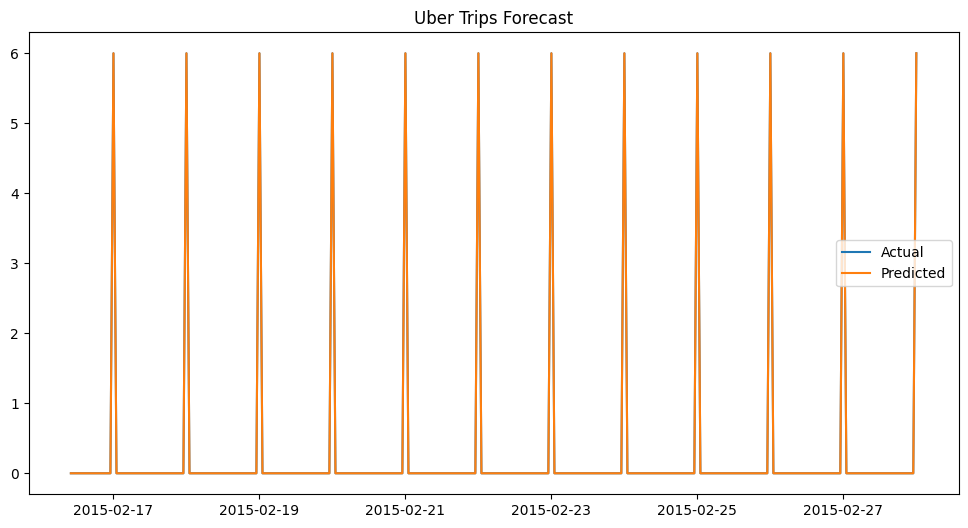

In [ ]:
# Assuming the main function in the previous cell has been executed,
# y_test and predictions should be available in the global scope.

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.title('Uber Trips Forecast')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

seed = 42 # Define the seed for reproducibility

rf_param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': [None, 'sqrt', 'log2']
}


rf_model = RandomForestRegressor(random_state=seed)

tscv = TimeSeriesSplit(n_splits=5)


rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=tscv,
n_jobs=-1, scoring='neg_mean_absolute_percentage_error',verbose = 1)
rf_grid_search.fit(X_train, y_train)


print("Best Random Forest parameters:", rf_grid_search.best_params_)


rf_predictions = rf_grid_search.best_estimator_.predict(X_test)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Random Forest parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


2015-01-01 00:00:00
2015-02-16 09:00:00


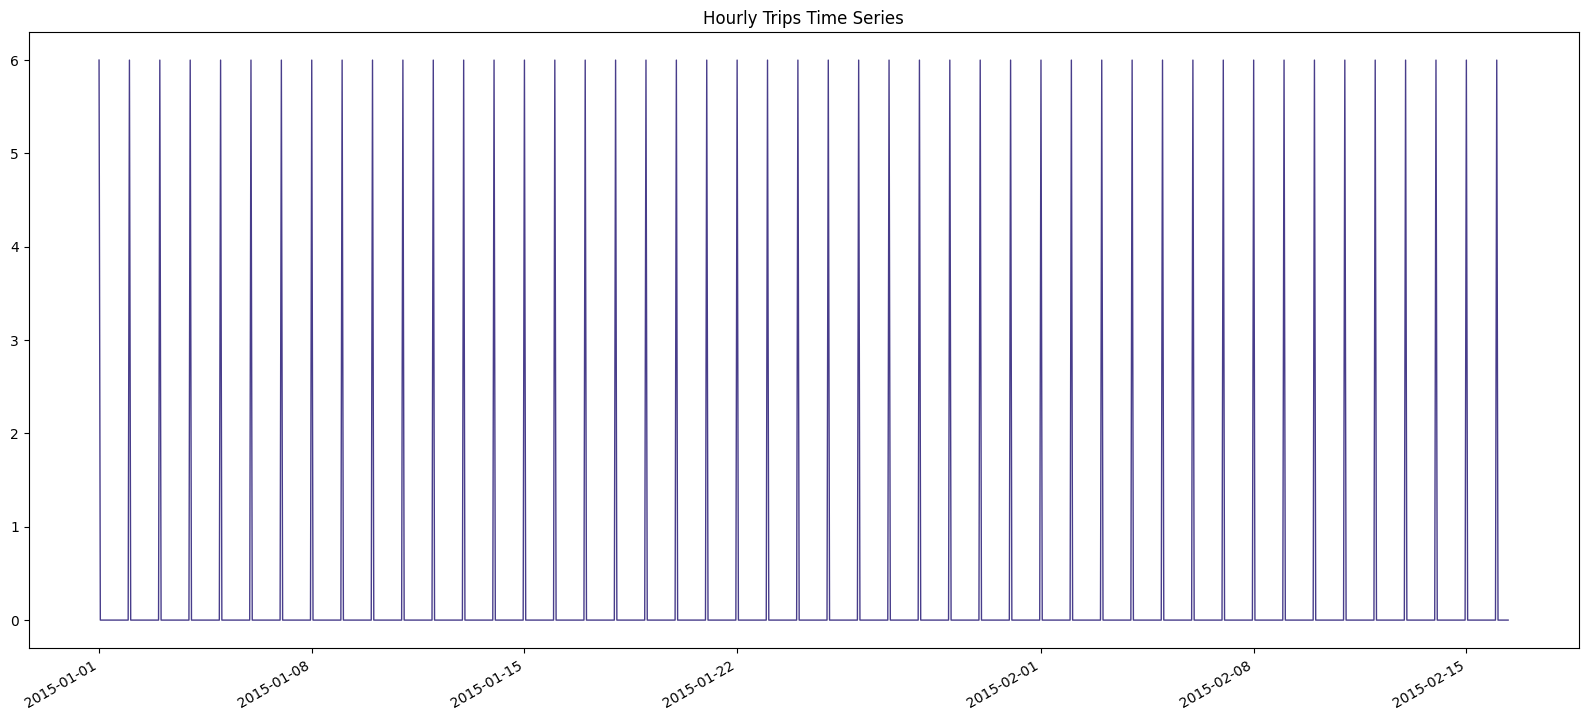

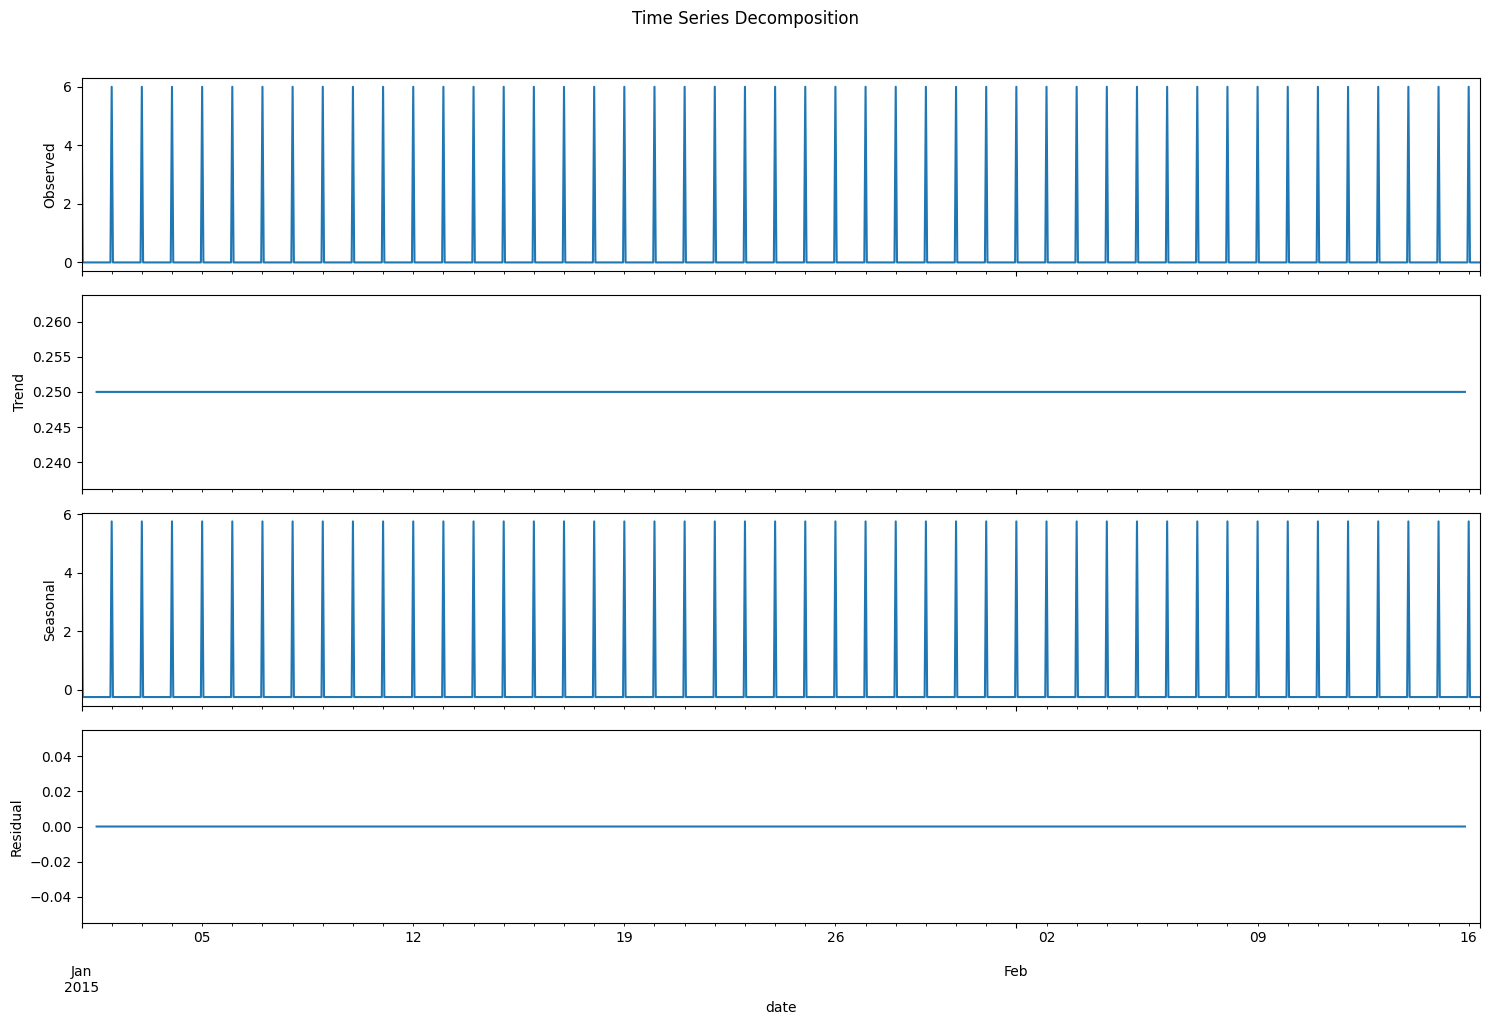

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



# Check if y_train is defined. If not, you need to run the previous cells first.
if 'y_train' in globals():
    time_series_data = y_train
    print(time_series_data.index.min())
    print(time_series_data.index.max())

    # Let's plot the series
    plt.figure(figsize=(20, 8))
    plt.plot(time_series_data.index, time_series_data.values, linewidth = 1, color='darkslateblue')
    plt.xticks(rotation=30,ha='right')
    plt.title('Hourly Trips Time Series')
    plt.show()

    result = seasonal_decompose(time_series_data, model='add', period=24)

    # Plot decomposition results using matplotlib
    fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
    result.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    result.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    result.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    result.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    plt.suptitle('Time Series Decomposition', y=1.02)
    plt.tight_layout()
    plt.show()

else:
    print("y_train is not defined. Please run the previous cells to load and prepare the data.")

## Import xgboost

### Subtask:
Import the necessary XGBoost library.


**Reasoning**:
The subtask is to import the xgboost library. I will add the import statement to a new code cell.



In [ ]:
import xgboost as xgb

## Define xgboost model and parameter grid

### Subtask:
Define the XGBoost regressor model and a parameter grid for hyperparameter tuning using `GridSearchCV`.


**Reasoning**:
Define the XGBoost regressor model and the parameter grid for hyperparameter tuning.



In [ ]:
# Instantiate an XGBoost regressor model
xgb_model = xgb.XGBRegressor(random_state=seed)

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

## Perform grid search

### Subtask:
Use `GridSearchCV` with `TimeSeriesSplit` (as used for the RandomForest model) to find the best hyperparameters for the XGBoost model.


**Reasoning**:
Use GridSearchCV with TimeSeriesSplit to find the best hyperparameters for the XGBoost model as instructed.



In [ ]:
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=tscv,
                               n_jobs=-1, scoring='neg_mean_absolute_percentage_error', verbose=1)
xgb_grid_search.fit(X_train, y_train)

print("Best XGBoost parameters:", xgb_grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


## Train with best parameters

### Subtask:
Train the XGBoost model using the best parameters found during the grid search on the training data (`X_train`, `y_train`).


**Reasoning**:
Train the XGBoost model with the best hyperparameters found during the grid search.



In [ ]:
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

**Reasoning**:
Use the trained XGBoost model to make predictions on the test data.



In [ ]:
xgb_predictions = best_xgb_model.predict(X_test)

## Evaluate xgboost model

### Subtask:
Calculate evaluation metrics (like MAPE) for the XGBoost model's predictions compared to the actual test values (`y_test`).


**Reasoning**:
Calculate the Mean Absolute Percentage Error (MAPE) between the actual test values (`y_test`) and the XGBoost model's predictions (`xgb_predictions`), and then print the result.



In [ ]:
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)
print(f'XGBoost MAPE:\t\t{xgb_mape:.2%}')

XGBoost MAPE:		2928191692800.00%


## Visualize xgboost predictions

### Subtask:
Plot the actual test values and the XGBoost model's predictions to visualize the performance.


**Reasoning**:
Plot the actual test values and the XGBoost model's predictions to visualize the performance.



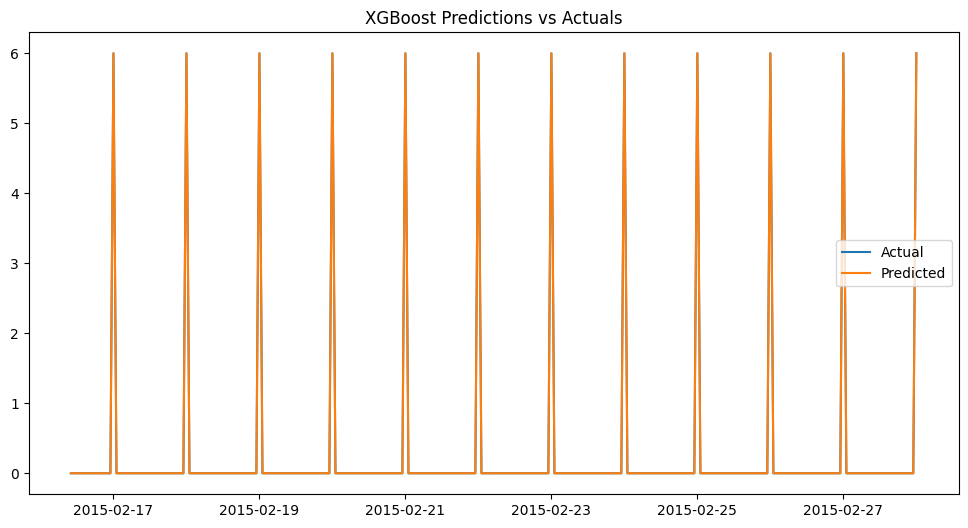

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, xgb_predictions, label='Predicted')
plt.legend()
plt.title('XGBoost Predictions vs Actuals')
plt.show()